In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df=pd.read_csv('/content/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<Axes: xlabel='SOP', ylabel='Density'>

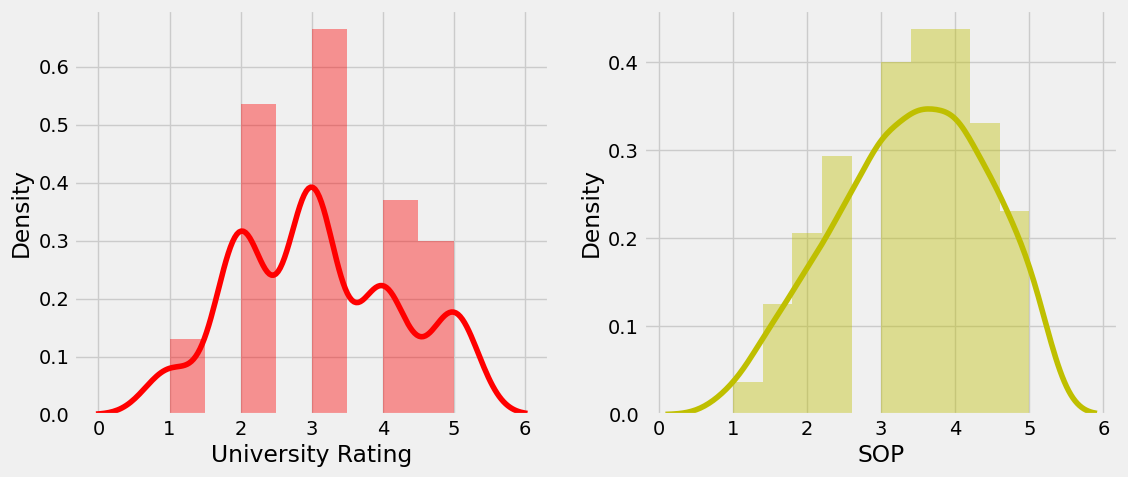

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['University Rating'],color='r')
plt.subplot(122)
sns.distplot(df['SOP'], color='y')

In [8]:
#creating dummy dataframe for categorical
df_cat = df.select_dtypes(include='int64')
df_cat.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,Research
0,1,337,118,4,1
1,2,324,107,4,1
2,3,316,104,3,1
3,4,322,110,3,1
4,5,314,103,2,0


In [9]:
for i,j in enumerate(df_cat):
  print(j)
  print(i)

Serial No.
0
GRE Score
1
TOEFL Score
2
University Rating
3
Research
4


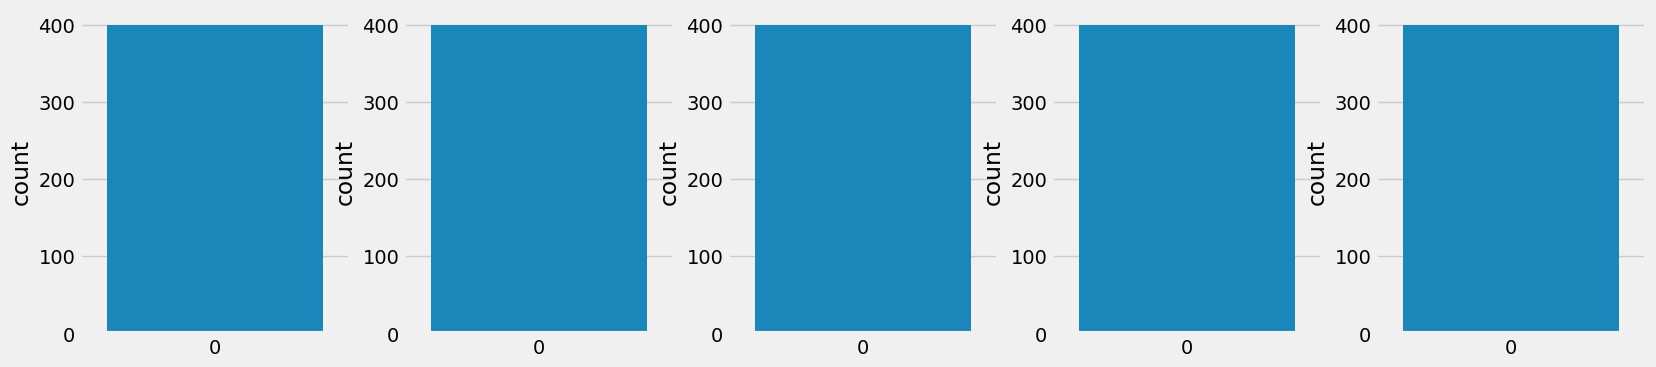

In [10]:

#visualizing counts in each variable
plt.figure(figsize=(18,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,5,i+1)
  sns.countplot(df[j])

<Axes: xlabel='University Rating', ylabel='count'>

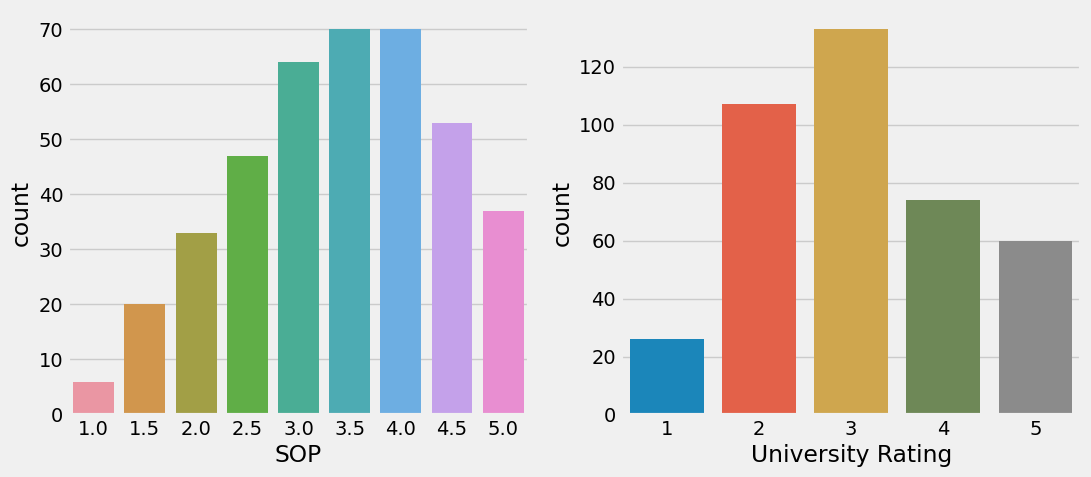

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.countplot(x='SOP',data=df)
plt.subplot(132)
sns.countplot(x='University Rating',data=df)


In [12]:
df['TOEFL Score'].min()

92

In [13]:
df.shape

(400, 9)

In [14]:
df['TOEFL Score_']=['92-95' if x<=95 else '95-105' if x>95 and x<=105 else '105+' for x in df['TOEFL Score']]

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,TOEFL Score_
0,1,337,118,4,4.5,4.5,9.65,1,0.92,105+
1,2,324,107,4,4.0,4.5,8.87,1,0.76,105+
2,3,316,104,3,3.0,3.5,8.00,1,0.72,95-105
3,4,322,110,3,3.5,2.5,8.67,1,0.80,105+
4,5,314,103,2,2.0,3.0,8.21,0,0.65,95-105


<Axes: xlabel='SOP', ylabel='TOEFL Score_'>

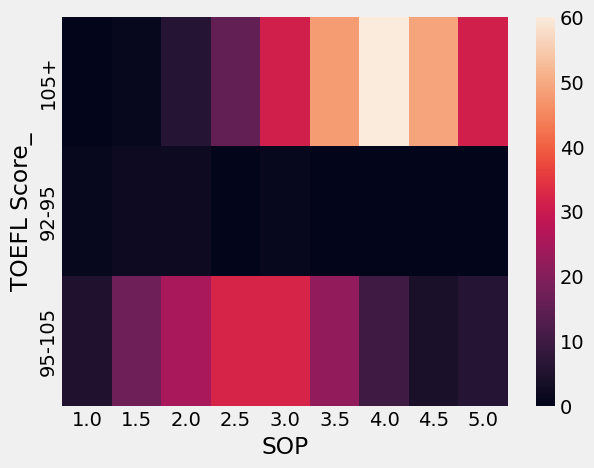

In [16]:
# finding relation between TOEFL Score_ & SOP
sns.heatmap(pd.crosstab(df['TOEFL Score_'],df['SOP']))

In [17]:
df.drop('TOEFL Score_', axis=1, inplace=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='University Rating', ylabel='count'>

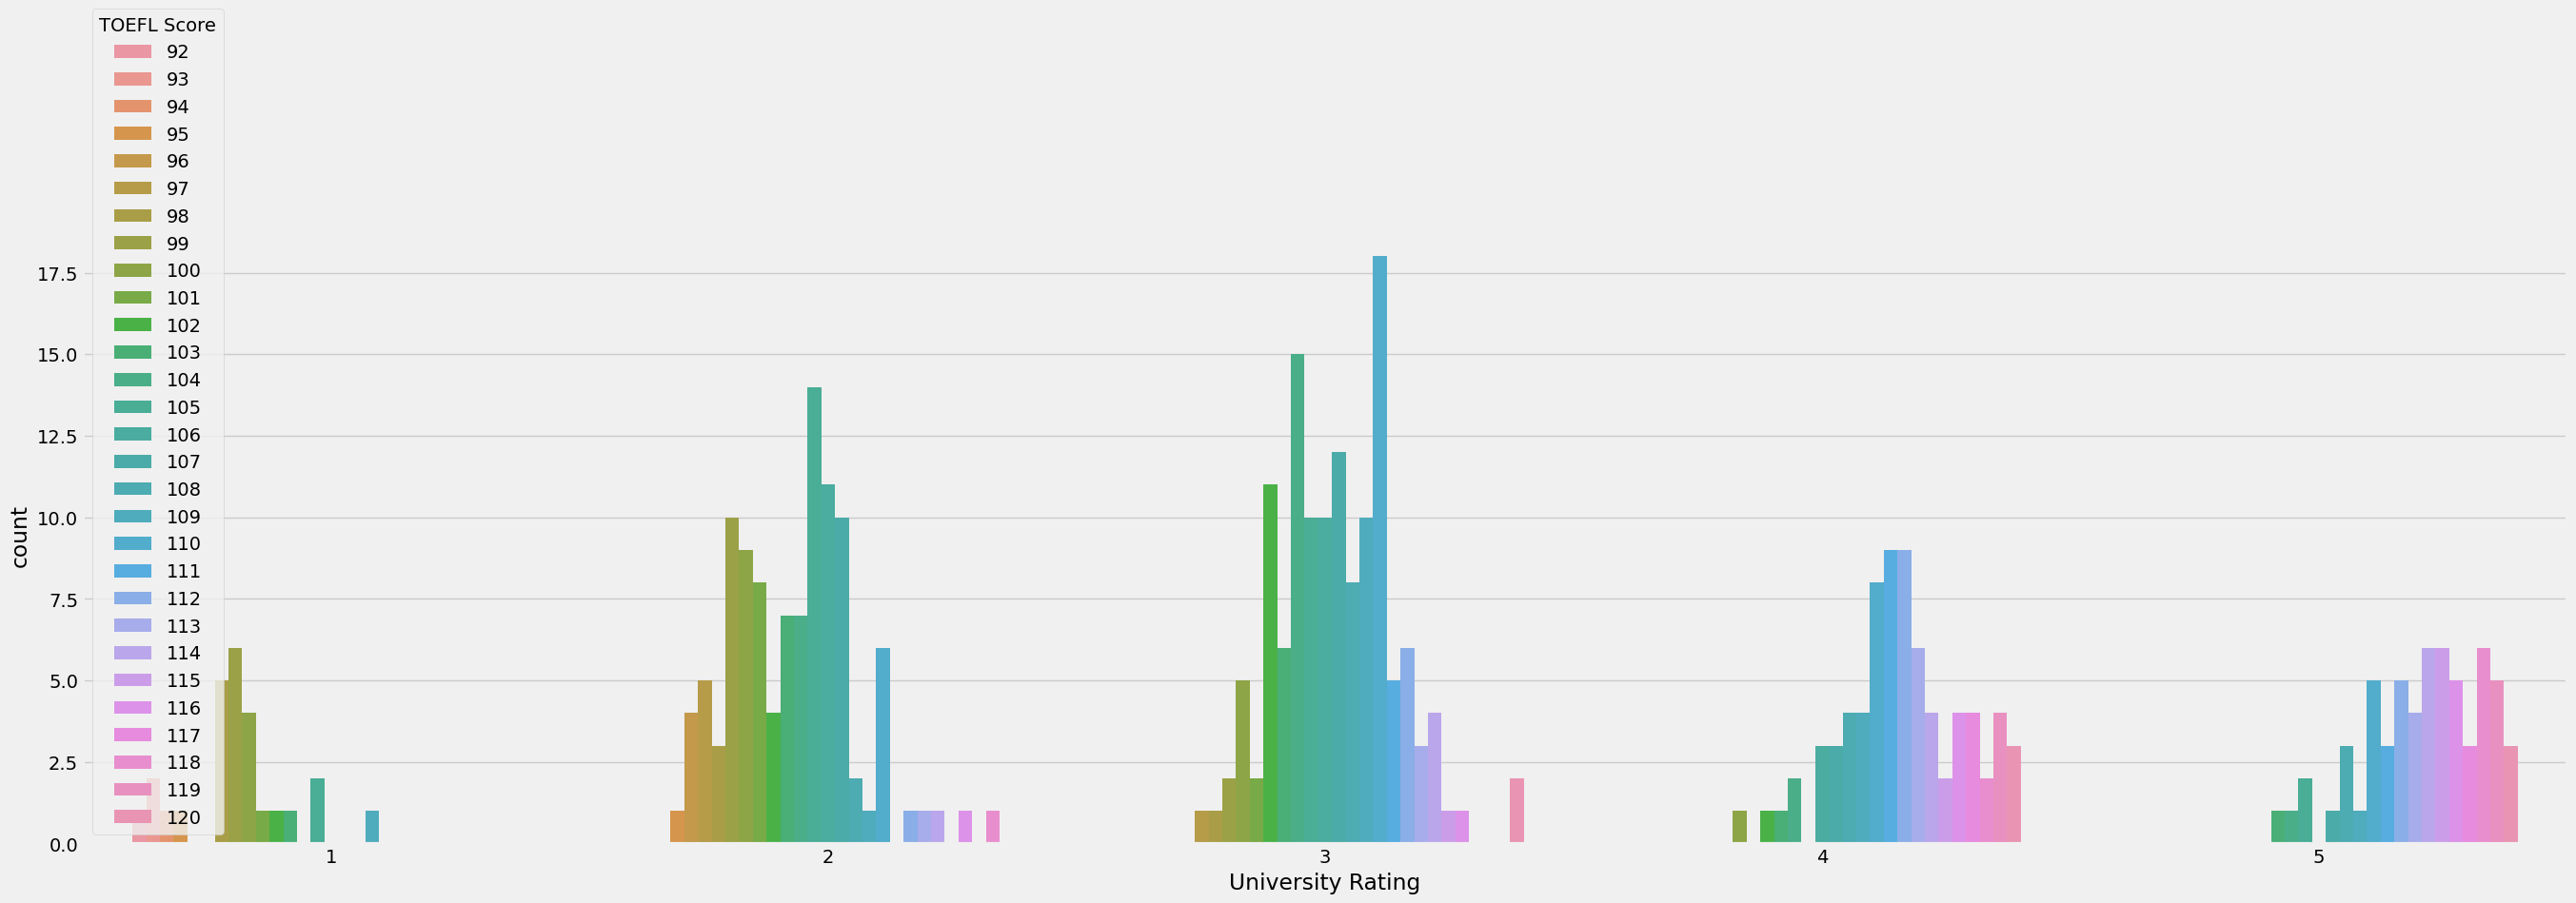

In [18]:
plt.figure(figsize=(30,8))
plt.subplot(111)
sns.countplot(data=df,x='University Rating',hue='TOEFL Score')

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

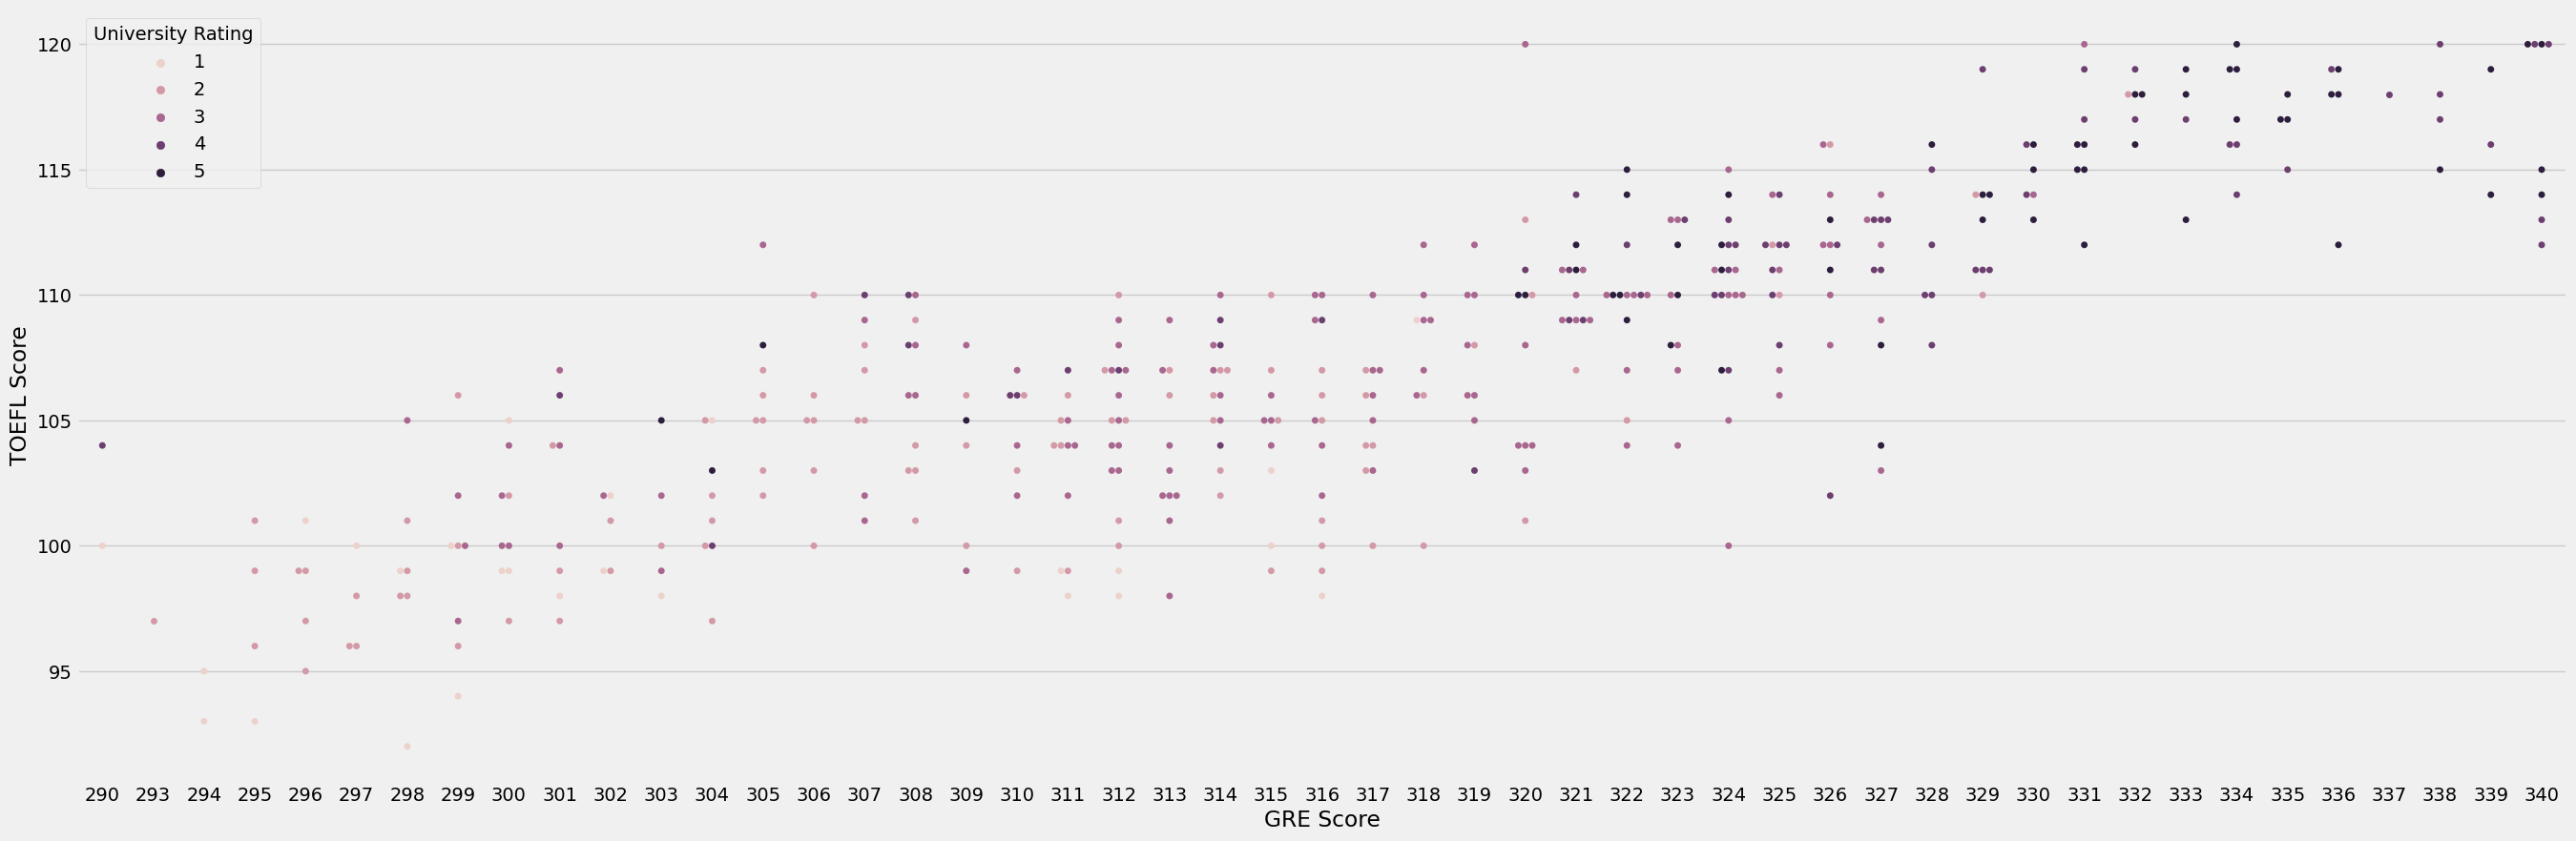

In [19]:
#multivariate analysis
plt.figure(figsize=(30,10))
sns.swarmplot(data=df, x='GRE Score',y='TOEFL Score',hue=df['University Rating'])

<Axes: >

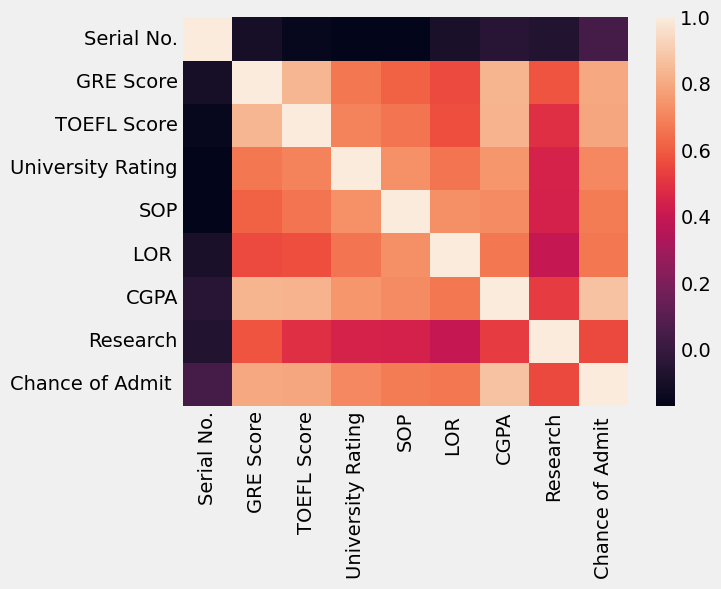

In [20]:
sns.heatmap(df.corr())

In [21]:
#descriptive analysis - descriptive stat
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [23]:
# Data preprocessing

In [24]:
#finding the shape of data
df.shape

(400, 9)

In [25]:
#finding the null value
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [26]:
#simlify check null value
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [27]:
#count of null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
df.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [29]:
#finding the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<Axes: >

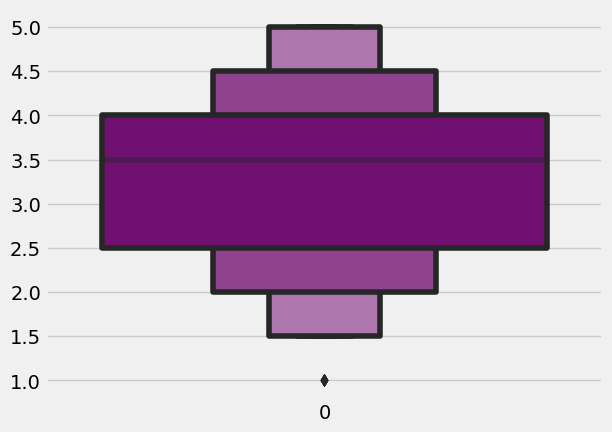

In [30]:
#finding outliers
sns.boxenplot(df['SOP'], color='purple')

<Axes: >

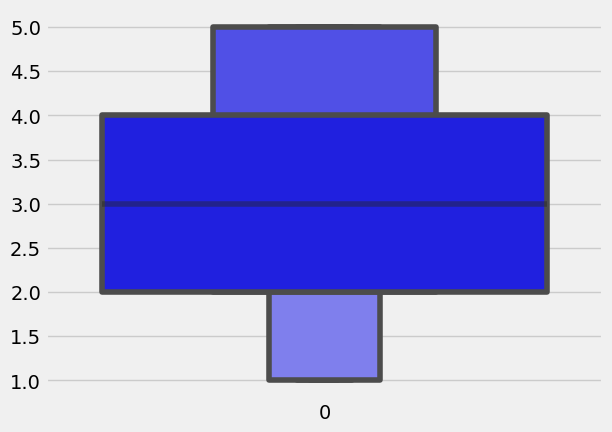

In [31]:
sns.boxenplot(df['University Rating'], color='b')

In [32]:
#finding the count of outliers
#IQR = q3-q1....., ub = q3+(1.5*IQR), lb = q1-(1.5*IQR)
q1 = np.quantile(df['University Rating'],0.25)
q3 = np.quantile(df['University Rating'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upper bound value is{} & the lower bound value is {}'.format(upperBound,lowerBound))

print('skwed data :',len(df[df['University Rating']>upperBound]))

Q1 = 2.0
Q3 = 4.0
IQR value is 2.0
The upper bound value is7.0 & the lower bound value is -1.0
skwed data : 0


In [33]:
len(df[df['University Rating']>upperBound])

0

<Axes: xlabel='SOP', ylabel='Density'>

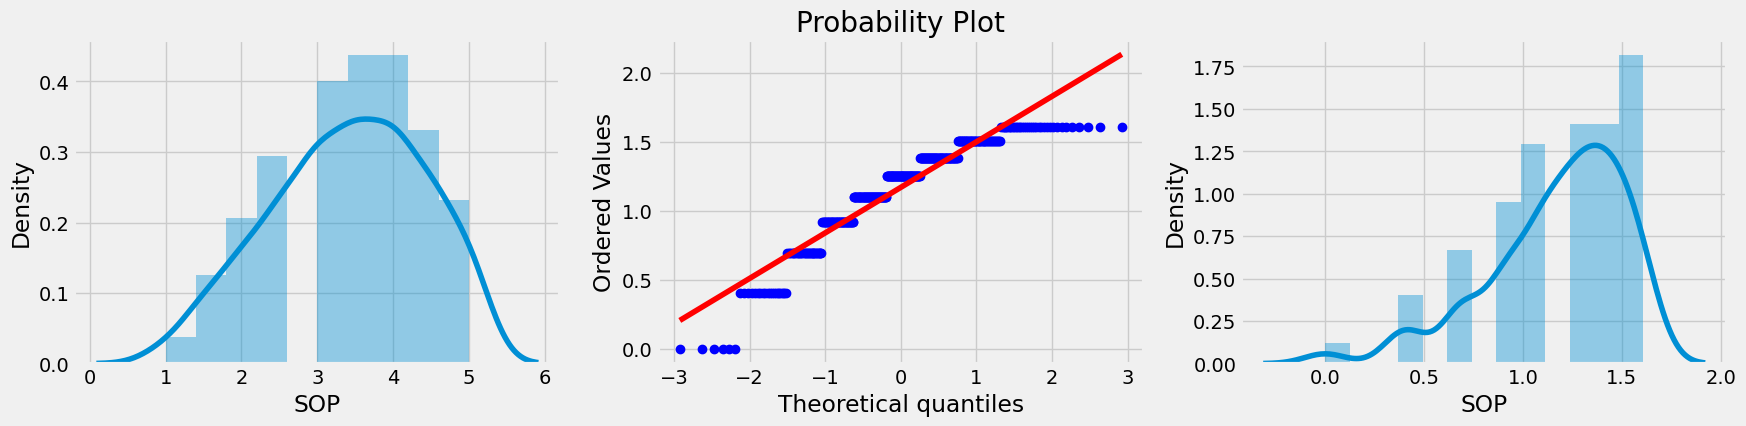

In [34]:
# Handling outliers

from scipy import stats

plt.figure(figsize=(19,4))
plt.subplot(131)
sns.distplot(df['SOP'])
plt.subplot(132)
stats.probplot(np.log((df['SOP'])),plot=plt)
plt.subplot(133)
sns.distplot(np.log(df['SOP']))


((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

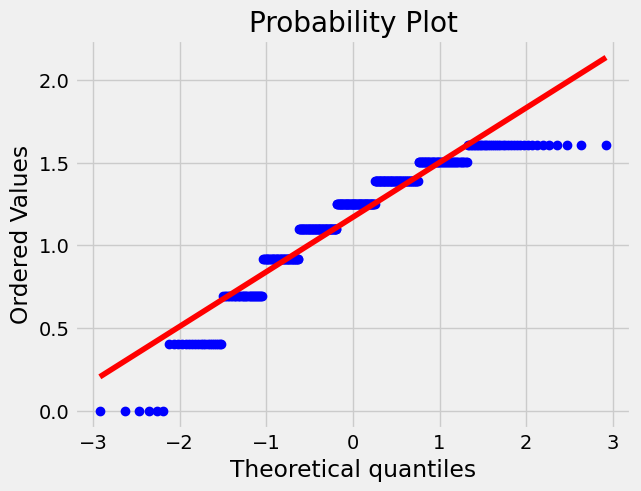

In [35]:
stats.probplot(np.log(df['SOP']),plot=plt)

In [36]:
#Transforming normal value to log value
df['SOP']=np.log(df['University Rating'])
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,1.386294,4.5,9.65,1,0.92
1,2,324,107,4,1.386294,4.5,8.87,1,0.76
2,3,316,104,3,1.098612,3.5,8.00,1,0.72
3,4,322,110,3,1.098612,2.5,8.67,1,0.80
4,5,314,103,2,0.693147,3.0,8.21,0,0.65


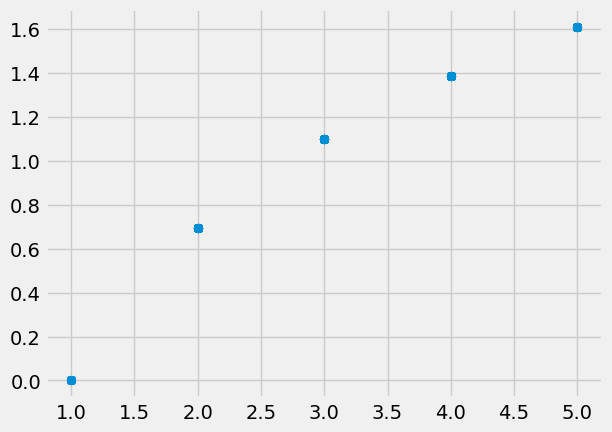

In [37]:
plt.scatter(df['University Rating'], df['SOP'])

In [41]:
y = df.iloc[:,5:1]
y.head()

""
0
1
2
3
4


In [39]:
x = df.iloc[:,0:1]
x.head()

,Serial No.
0,1
1,2
2,3
3,4
4,5


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=11) 

In [44]:
print(xtrain.shape)
print(xtest.shape)

(320, 1)
(80, 1)


In [45]:
# Model building 
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression

In [48]:
df['SOP'].unique()

array([1.38629436, 1.09861229, 0.69314718, 1.60943791, 0.        ])

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder

In [51]:
x = df.iloc[:,0:4]
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating
0,1,337,118,4
1,2,324,107,4
2,3,316,104,3
3,4,322,110,3
4,5,314,103,2


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from IPython.utils import text
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [55]:
print(xtrain)
print(xtest)

     Serial No.  GRE Score  TOEFL Score  University Rating
303         304        323          107                  3
349         350        313          101                  3
149         150        311          106                  2
100         101        322          107                  3
175         176        320          111                  4
..          ...        ...          ...                ...
369         370        301           98                  1
320         321        317          106                  3
15           16        314          105                  3
125         126        300          100                  3
265         266        313          102                  3

[320 rows x 4 columns]
     Serial No.  GRE Score  TOEFL Score  University Rating
332         333        308          106                  3
111         112        321          109                  4
352         353        303          100                  2
205         206        295      

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression

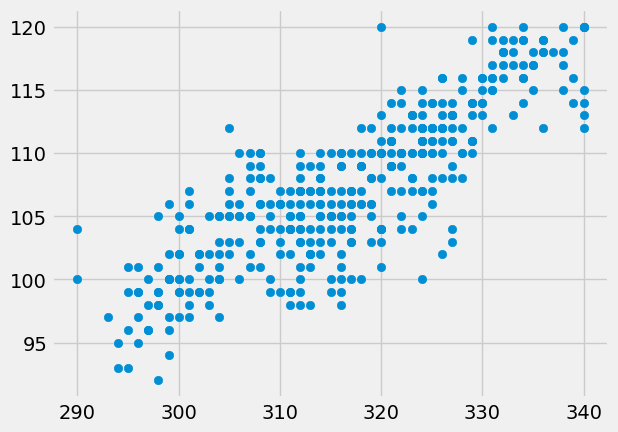

In [59]:
plt.scatter(df['GRE Score'], df['TOEFL Score'])

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.157157,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.650411,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.683802,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.968804,0.660123,0.746479,0.447783,0.711250
SOP,-0.157157,0.650411,0.683802,0.968804,1.000000,0.653047,0.729764,0.433296,0.685960
LOR,-0.088221,0.557555,0.567721,0.660123,0.653047,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.729764,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.433296,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.685960,0.669889,0.873289,0.553202,1.000000


In [67]:
lr = LinearRegression()

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

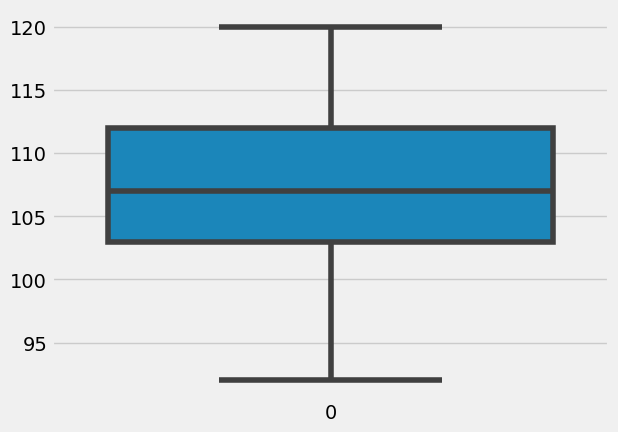

In [70]:
sns.boxplot(df['TOEFL Score'])